In [152]:
import tensorflow
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [153]:
raw_data = pd.read_excel("maliciousornot.xlsx")

In [154]:
raw_data.isnull().sum()

Type                         0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
SOURCE_A                     0
SOURCE_B                     0
SOURCE_C                     0
SOURCE_D                     0
SOURCE_F                     0
SOURCE_E                     0
SOURCE_G                     0
SOURCE_H                     0
SOURCE_I                     0
SOURCE_J                     0
SOURCE_K                     0
SOURCE_M                     0
SOURCE_L                     0
SOURCE_N                     0
SOURCE_O                     0
SOURCE_P                     0
SOURCE_R                     0
SOURCE_S                     0
dtype: int64

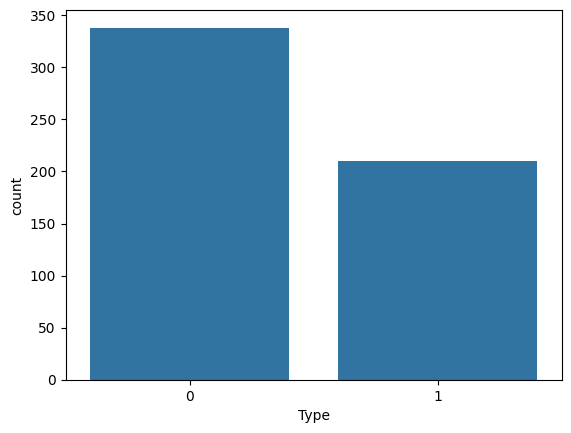

In [155]:
sbn.countplot(x="Type", data = raw_data)
plt.show()

<Axes: >

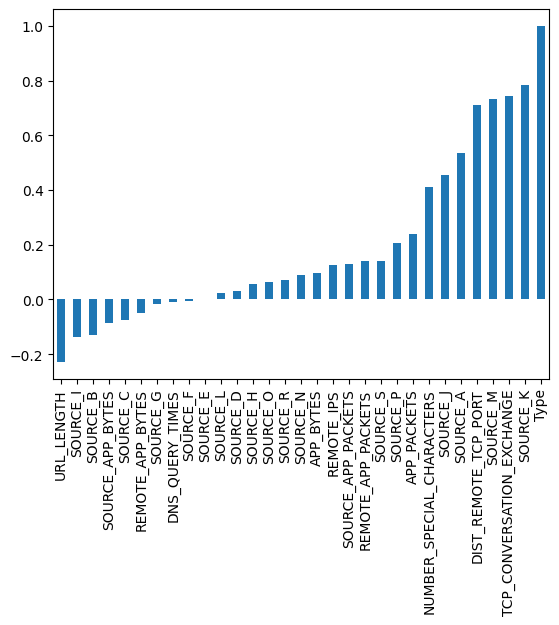

In [156]:
raw_data.corr()["Type"].sort_values().plot(kind="bar")

In [157]:
y_data = raw_data["Type"].values
x_data = raw_data.drop("Type", axis=1).values

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=15)

In [159]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [160]:
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

earlystop = EarlyStopping(monitor="val_loss", verbose=1, mode="min", patience=25)

model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=700, verbose=1, callbacks=[earlystop])

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.7081 - val_loss: 0.7037
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6920 - val_loss: 0.6971
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6829 - val_loss: 0.6898
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6887 - val_loss: 0.6826
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6581 - val_loss: 0.6751
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6598 - val_loss: 0.6689
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6536 - val_loss: 0.6640
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6383 - val_loss: 0.6577
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6588 - val_loss: 0.6496
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6244 - val_loss: 0.6392
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6200 - val_loss: 0.6305
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

<Axes: >

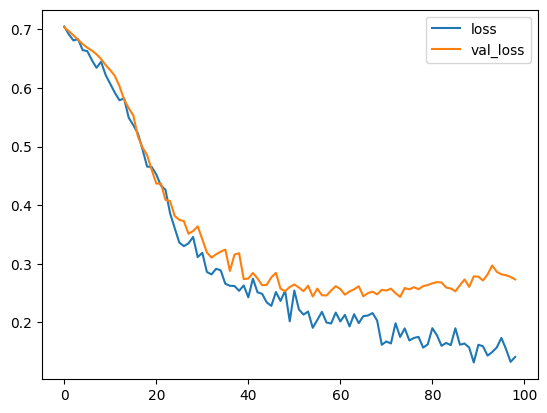

In [161]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [162]:
predictss = (model.predict(x_test) > 0.5).astype("int32")
predictss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [163]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [172]:
print(f"""
cr = {classification_report(y_true=y_test, y_pred= predictss)}
cm =\n {confusion_matrix(y_true=y_test, y_pred= predictss)}
as = {accuracy_score(y_true=y_test, y_pred= predictss)}

""")


cr =               precision    recall  f1-score   support

           0       0.90      0.91      0.91        91
           1       0.89      0.88      0.88        74

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165

cm =
 [[83  8]
 [ 9 65]]
as = 0.896969696969697


